Lessons in the Global Proficiency Framework
===

Data from Rori / Rising Academies.

Global Proficiency Framework data from: https://gaml.uis.unesco.org/wp-content/uploads/sites/2/2021/03/Global-Proficiency-Framework-Math-Tables.xlsx

The more readable PDF is here: https://www.edu-links.org/sites/default/files/media/file/GPF-Math-Final.pdf

The CSV is this data imported into Google Sheets, every cell selected (with Ctrl+A), and selecting Format -> Merge Cells -> Unmerge.



In [388]:
from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_dir = Path("../data")
assert data_dir.exists()

In [46]:
# this is a
gpf_tables_filepath = data_dir / "raw" / "Global-Proficiency-Framework-Math-Tables.xlsx - Unmerged Skills.csv"
assert gpf_tables_filepath.exists()
gpf_tables = pd.read_csv(gpf_tables_filepath, header=0)
gpf_tables.shape

(114, 16)

In [47]:
# convert grades to indicators
grade_cols = [col for col in gpf_tables.columns if col.startswith("G")]
gpf_tables[grade_cols] = gpf_tables[grade_cols].notna()

In [48]:
gpf_tables.head()

,Domain,Domain Description,Construct,Construct Description,Subconstruct,Subconstruct Description,Knowledge or Skill,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,N,Number and operations,N1,Whole numbers,N1.1,"Identify and count in whole numbers, and ident...","N1.1.1 - Count, read, and write whole numbers",True,True,True,True,True,True,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,N1.1.2 - Compare and order whole numbers,True,True,True,True,True,True,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,N1.1.3 - Skip count forwards or backwards,False,True,True,True,True,True,False,False,False
3,NaN,NaN,NaN,NaN,N1.2,Represent whole numbers in equivalent ways,N1.2.1 - Determine or identify the equivalency...,True,True,True,False,False,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,N1.2.2 - Use place-value concepts,False,True,True,True,True,True,False,False,False


In [124]:
ds = []
domain = None
construct = None
subconstruct = None
for row in gpf_tables.itertuples(name=None):
    if pd.notna(row[1]):
        domain = row[1]
        domain_description = row[2]
    if pd.notna(row[3]):
        construct = row[3]
        construct_description = row[4]
    if pd.notna(row[5]):
        subconstruct = row[5]
        subconstruct_description = row[6]
    if "-" not in row[7]:
        # use the skill from a previous row; this happens exactly once
        skill_description = row[7]
    else:
        skill, skill_description = row[7].split(" - ")
    lowest_grade = row[8:].index(True) + 1
    highest_grade = 9
    try:
        highest_grade = lowest_grade + row[8 + lowest_grade :].index(False)
    except ValueError:
        pass
    assert highest_grade >= lowest_grade
    ds.append(
        {
            "domain": domain,
            "domain_description": domain_description,
            "construct": construct,
            "construct_description": construct_description,
            "subconstruct": subconstruct,
            "subconstruct_description": subconstruct_description,
            "skill": skill,
            "skill_description": skill_description,
            "lowest_grade": lowest_grade,
            "highest_grade": highest_grade,
        }
    )
len(ds)

114

In [125]:
gpf_code_df = pd.DataFrame(ds)
gpf_code_df.sample(n=5)

,domain,domain_description,construct,construct_description,subconstruct,subconstruct_description,skill,skill_description,lowest_grade,highest_grade
24,N,Number and operations,N3,Decimals,N3.1,"Identify and represent decimals using objects,...",N3.1.1,Identify and represent quantities using decima...,5,7
60,M,Measurement,M2,Time,M2.2,Solve problems involving time,M2.2.3,Solve problems involving conversions of time: ...,7,9
32,N,Number and operations,N3,Decimals,N3.4,Solve real-world problems involving decimals,N3.4.1,Solve real-world problems involving the additi...,6,8
104,A,Algebra,A3,Relations and functions,A3.1,"Solve problems involving variation (ratio, pro...",A3.1.2,Solve problems involving equal ratios,7,9
19,N,Number and operations,N2,Fractions,N2.2,Solve operations using fractions,N2.2.1,Add and subtract fractions,4,7


In [126]:
gpf_code_df[gpf_code_df.construct == "N5"]

,domain,domain_description,construct,construct_description,subconstruct,subconstruct_description,skill,skill_description,lowest_grade,highest_grade
37,N,Number and operations,N5,Exponents and roots,N5.1,Identify and represent quantities using expone...,N5.1.1,"Identify the square and cube, and the square a...",7,8
38,N,Number and operations,N5,Exponents and roots,N5.1,Identify and represent quantities using expone...,N5.1.2,Identify and represent numbers using scientifi...,7,9
39,N,Number and operations,N5,Exponents and roots,N5.1,Identify and represent quantities using expone...,N5.1.3,Compare and order numbers expressed in scienti...,7,9
40,N,Number and operations,N5,Exponents and roots,N5.2,Solve operations involving exponents and roots,N5.2.1,"Add, subtract, multiply, and divide quantities...",8,9


In [127]:
skill_map = gpf_code_df.set_index("skill")

In [134]:
gpf_code_df[gpf_code_df.skill.str.contains("A3.3.5")]

,domain,domain_description,construct,construct_description,subconstruct,subconstruct_description,skill,skill_description,lowest_grade,highest_grade


In [354]:
rori_content_filepath = data_dir / "raw" / "rori" / "Rori Chatbot Content.xlsx"
assert rori_content_filepath.exists()

In [375]:
sheet_dict = pd.read_excel(rori_content_filepath, sheet_name=None, header=None, dtype=object)
len(sheet_dict)

235

In [376]:
sorted(sheet_dict.keys())[:10]

['G1.M2.1.1.1',
 'G1.N1.1.1.1',
 'G1.N1.1.1.2',
 'G1.N1.1.2.1',
 'G1.N1.1.2.2',
 'G1.N1.1.2.3',
 'G1.N1.1.2.4',
 'G1.N1.3.1.1',
 'G1.N1.3.1.11',
 'G1.N1.3.1.4']

In [377]:
def get_gpd_codes(lesson_code, skill_map):
    """
    Structure is: G<grade>.<domain><construct>.<subconstruct>.<skill>.<index>

    e.g. G9.N5.1.3.1 has:
        grade 9
        domain N
        construct N5
        subconstruct N5.1
        skill N5.1.3
        index 1
    """
    tokens = lesson_code.split(".")
    grade = int(tokens[0][1])
    index = int(tokens[-1])

    skill = ".".join(tokens[1:-1])

    valid_gpf_code = True
    try:
        domain = skill_map.loc[skill, "domain"]
        construct = skill_map.loc[skill, "construct"]
        subconstruct = skill_map.loc[skill, "subconstruct"]
    except KeyError:
        domain = tokens[1][0]
        construct = tokens[1]
        subconstruct = tokens[1] + "." + tokens[2]
        valid_gpf_code = False
    return grade, domain, construct, subconstruct, skill, index, valid_gpf_code


get_gpd_codes("G9.N5.1.3.1", skill_map), get_gpd_codes("G9.N0.0.0.1", skill_map)

((9, 'N', 'N5', 'N5.1', 'N5.1.3', 1, True),
 (9, 'N', 'N0', 'N0.0', 'N0.0.0', 1, False))

In [396]:
ds = []
for sheet_name, df in sheet_dict.items():
    if sheet_name.startswith("G"):
        assert df.iloc[0, 4].strip() == "Yes"
        assert df.iloc[0, 2].strip() == "Q1"
        topic = df.iloc[0, 0].strip()
        assert topic != ""
        short_description = df.iloc[0, 1].strip()
        assert short_description != ""
        lesson_and_q1 = df.iloc[0, 3]

        grade, domain, construct, subconstruct, skill, index, is_valid_gpf_code = get_gpd_codes(sheet_name, skill_map)

        # confirming that there is no content in the first or second columns other than in row 0
        for col in [0, 1, 6]:
            expected_empty = df.iloc[1:, col]
            if col == 1:
                # there is SOMETIMES an extra line of instructions in the second column
                assert (
                    np.sum((expected_empty == "") | (expected_empty.str.startswith("-")) | (expected_empty.isna()))
                    >= len(expected_empty) - 1
                )
            else:
                assert np.all((expected_empty == "") | (expected_empty.str.startswith("-")) | (expected_empty.isna()))

        has_question_image_link = df.iloc[:, 7].str.len() > 1
        has_hint_image_link = df.iloc[:, 8].str.len() > 1
        has_question = df.iloc[:, 2].str.startswith("Q")
        has_nontrivial_answer = ~df.iloc[:, 4].map(lambda v: str(v).startswith("Yes"))

        questions = []
        for row in df[has_nontrivial_answer].itertuples():
            question_text = str(row[4])
            answer_text = row[5]
            if type(answer_text) == datetime:
                # this is horrible; I hate excel
                answer_text = answer_text.strftime("%m/%d").lstrip("0").replace("/0", "/")
            hint_text = str(row[6])
            questions.append(
                {
                    "question": question_text,
                    "answer": answer_text,
                    "hint": hint_text,
                }
            )

        lesson_parts = []
        for row in df[~has_nontrivial_answer].itertuples():
            lesson_parts.append(row[4])
        assert len(lesson_parts) > 0

        ds.append(
            {
                "lesson_code": sheet_name,
                "grade": grade,
                "domain": domain,
                "construct": construct,
                "subconstruct": subconstruct,
                "skill": skill,
                "index": index,
                "is_valid_gpf_code": is_valid_gpf_code,
                "topic": topic,
                "short_description": short_description,
                "question_count": has_question.sum(),
                "question_image_count": has_question_image_link.sum(),
                "hint_image_count": has_hint_image_link.sum(),
                "nontrivial_answer_count": has_nontrivial_answer.sum(),
                "nontrivial_answer_to_image_question_count": (
                    (has_nontrivial_answer) & (has_question_image_link)
                ).sum(),
                "questions": questions,
                "lesson_parts": lesson_parts,
                "n_lesson_parts": len(lesson_parts),
            }
        )

In [397]:
df = pd.DataFrame(ds)
df.head(3)

,lesson_code,grade,domain,construct,subconstruct,skill,index,is_valid_gpf_code,topic,short_description,question_count,question_image_count,hint_image_count,nontrivial_answer_count,nontrivial_answer_to_image_question_count,questions,lesson_parts,n_lesson_parts
0,G9.A3.4.1.1,9,A,A3,A3.4,A3.4.1,1,True,Functions,"In this activity, we will learn about linear a...",14,13,0,9,9,[{'question': 'Choose the correct coordinates ...,[A function is like a machine that takes an in...,5
1,G9.A3.3.5.1,9,A,A3,A3.3,A3.3.5,1,False,Quadratic equations,Let's work with quadratic equations today!,12,0,0,10,0,[{'question': 'What point satisfies the follow...,[A quadratic equation often takes the form of ...,2
2,G9.A3.3.4.1,9,A,A3,A3.3,A3.3.4,1,True,Inequalities,Let's work on inequalities in math.,13,0,0,10,0,[{'question': 'Solve for p: p + 4 > 2 A. p < ...,[An inequality shows that a quantity is either...,3


In [398]:
df[df.lesson_code == "G8.N3.2.4.1"]["questions"].iloc[0]

[{'question': '8/10 = _____%',
  'answer': 80,
  'hint': 'Divide 8 by 10 to get 0.8.\nMultiply 0.8 x 100 = ?'},
 {'question': '2/5 = _____%',
  'answer': 40,
  'hint': 'Divide 2 by 5 to get 0.4.\nMultiply 0.4 x 100 = ?'},
 {'question': '6/20 = _____%',
  'answer': 30,
  'hint': 'Divide 6 by 20 to get 0.3.\nMultiply 0.3 x 100 = ?'},
 {'question': '34/100 = _____%',
  'answer': 34,
  'hint': 'Divide 34 by 100 to get 0.34. \nMultiply this answer by 100.'},
 {'question': '125/1000 = ____ %',
  'answer': 12.5,
  'hint': 'Divide the numerator by the denominator and multiply the answer by 100.'},
 {'question': '60% = ____\nWrite the answer in fraction form with a slash (/) to seperate the numerator and denominator.',
  'answer': '3/5',
  'hint': 'Divide 60 by 100. \n60/100 simplifies to ?'},
 {'question': '10% = ___\nWrite the answer in fraction form with a slash (/) to seperate the numerator and denominator',
  'answer': '1/10',
  'hint': 'Divide 10 by 100. \n10/100 simplifies to ?'},
 {'que

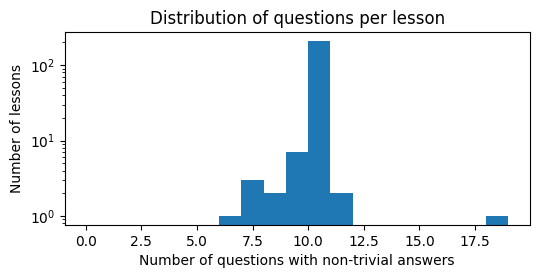

In [399]:
fig, ax = plt.subplots(1, 1, figsize=(6, 2.5))

ax.set_title("Distribution of questions per lesson")
ax.set_xlabel("Number of questions with non-trivial answers")
ax.set_ylabel("Number of lessons")

ax.hist(df.nontrivial_answer_count, bins=np.arange(0, 20), log=True)

plt.show()

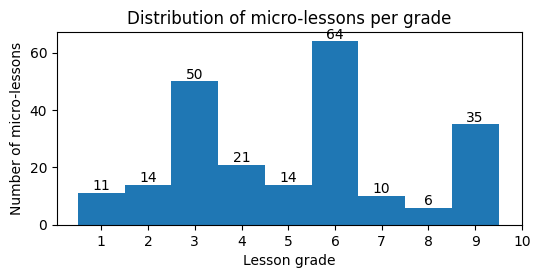

In [400]:
fig, ax = plt.subplots(1, 1, figsize=(6, 2.5))

ax.set_title("Distribution of micro-lessons per grade")
ax.set_xlabel("Lesson grade")
ax.set_ylabel("Number of micro-lessons")

xs = np.arange(1, 11)
ns, _, _ = ax.hist(df.grade, bins=xs, align="left")
for i, n in enumerate(ns):
    ax.text(i + 1, n, f"{n:.0f}", ha="center", va="bottom")

ax.set_xticks(xs, labels=[str(v) for v in xs])

plt.show()

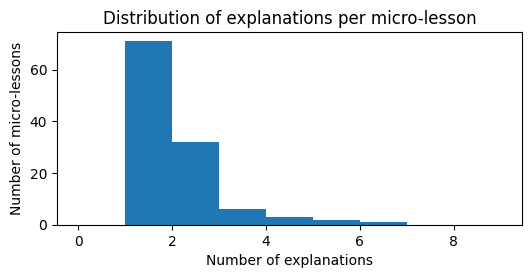

In [401]:
fig, ax = plt.subplots(1, 1, figsize=(6, 2.5))

ax.set_title("Distribution of explanations per micro-lesson")
ax.set_xlabel("Number of explanations")
ax.set_ylabel("Number of micro-lessons")

xs = np.arange(0, 10)
sdf = df[df.grade >= 6]
ax.hist(sdf.n_lesson_parts, bins=xs)

plt.show()

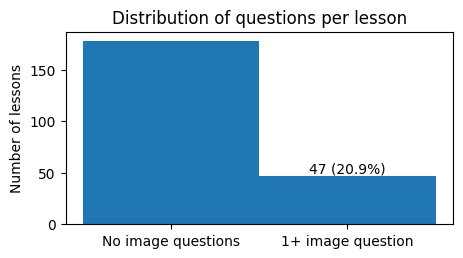

In [402]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2.5))

ax.set_title("Distribution of questions per lesson")
ax.set_ylabel("Number of lessons")

ax.hist((df.nontrivial_answer_to_image_question_count > 0).astype(int), bins=[0, 1, 2])
ax.set_xticks([0.5, 1.5], labels=["No image questions", "1+ image question"])

image_lessons_count = (df.nontrivial_answer_to_image_question_count > 0).sum()
ax.text(
    1.5, image_lessons_count, f"{image_lessons_count} ({image_lessons_count / len(df):.1%})", va="bottom", ha="center"
)

plt.show()

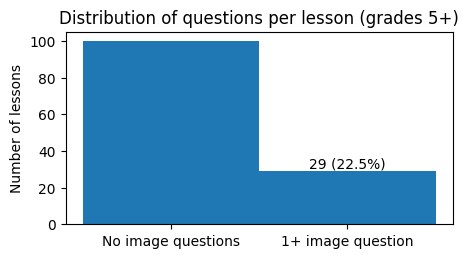

In [403]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2.5))

ax.set_title("Distribution of questions per lesson (grades 5+)")
ax.set_ylabel("Number of lessons")
sdf = df[df.grade >= 5]

ax.hist((sdf.nontrivial_answer_to_image_question_count > 0).astype(int), bins=[0, 1, 2])
ax.set_xticks([0.5, 1.5], labels=["No image questions", "1+ image question"])

image_lessons_count = (sdf.nontrivial_answer_to_image_question_count > 0).sum()
ax.text(
    1.5, image_lessons_count, f"{image_lessons_count} ({image_lessons_count / len(sdf):.1%})", va="bottom", ha="center"
)

plt.show()

In [404]:
pd.crosstab(
    df.grade,
    (df.nontrivial_answer_to_image_question_count > 0).rename("Number of lessons with image questions"),
    margins=True,
)

Number of lessons with image questions,False,True,All
grade,,,
1,10,1,11
2,13,1,14
3,38,12,50
4,17,4,21
5,14,0,14
6,51,13,64
7,10,0,10
8,6,0,6
9,19,16,35


In [405]:
pd.crosstab(df.grade, df.domain, margins=True).T

grade,1,2,3,4,5,6,7,8,9,All
domain,,,,,,,,,,
A,0,0,1,0,0,4,0,2,9,16
G,0,0,7,1,0,8,0,0,8,24
M,1,1,5,2,0,6,0,0,6,21
N,10,13,35,18,14,42,10,4,6,152
S,0,0,2,0,0,4,0,0,6,12
All,11,14,50,21,14,64,10,6,35,225


In [407]:
sdf = df[(df.nontrivial_answer_to_image_question_count == 0) & (df.grade.isin([6, 7, 8]))]
print(len(sdf))
sdf.sample(5)

67


,lesson_code,grade,domain,construct,subconstruct,skill,index,is_valid_gpf_code,topic,short_description,question_count,question_image_count,hint_image_count,nontrivial_answer_count,nontrivial_answer_to_image_question_count,questions,lesson_parts,n_lesson_parts
38,G7.N5.1.1.2,7,N,N5,N5.1,N5.1.1,2,True,Indices (2 of 2),Let's write multiplication expressions using i...,11,0,0,10,0,"[{'question': '2 x 2 = ___ ', 'answer': '2^2',...",[An index (or indices) is the power or an expo...,1
223,G8.N4.2.3.1,8,N,N4,N4.2,N4.2.3,1,False,Find HCF and LCM (1 of 2),"In this lesson, we are going find the highest ...",11,0,0,10,0,"[{'question': '8 and 12', 'answer': 4, 'hint':...",[Highest common factor is the largest whole nu...,1
203,G6.N2.2.3.10,6,N,N2,N2.2,N2.2.3,10,True,Multiply and divide (2 of 4),Can you find the reciprocal of a fraction? Tur...,11,0,0,10,0,"[{'question': '4/5 = ____', 'answer': '5/4', '...",[The reciprocal of a fraction is the same as t...,1
189,G6.N1.3.7.1,6,N,N1,N1.3,N1.3.7,1,True,Two or more operations,"Today, I will give you some expressions for so...",11,0,0,10,0,"[{'question': ' 4 x 2 + 15 ÷ 3 =_____', 'answe...",[Let’s learn how to solve an expression involv...,1
173,G6.N1.1.2.1,6,N,N1,N1.1,N1.1.2,1,True,Compare and order ( 1 of 3),"We will compare large numbers using the >, < a...",11,0,0,10,0,"[{'question': '700,000 ___ 800,000.', 'answer'...","[Numbers are compared using the symbols <, > a...",1


In [416]:
sdf = df[(df.nontrivial_answer_to_image_question_count == 0) & (df.grade.isin([6, 7, 8]))].copy().reset_index(drop=True)
j = sdf.to_json()
with open(data_dir / "derived" / "rori_lessons.json", "w") as outfile:
    outfile.write(j)

In [417]:
with open(data_dir / "derived" / "rori_lessons.json") as infile:
    ndf = pd.read_json(infile)
sdf.shape == ndf.shape

True

In [418]:
# assert (sdf == ndf).all()
(sdf.copy() == ndf).all()

lesson_code                                   True
grade                                         True
domain                                        True
construct                                     True
subconstruct                                  True
skill                                         True
index                                         True
is_valid_gpf_code                             True
topic                                         True
short_description                             True
question_count                                True
question_image_count                          True
hint_image_count                              True
nontrivial_answer_count                       True
nontrivial_answer_to_image_question_count     True
questions                                    False
lesson_parts                                  True
n_lesson_parts                                True
dtype: bool

In [419]:
for i in range(len(sdf)):
    assert ndf.iloc[i].questions == sdf.iloc[i].questions

AssertionError: 

In [422]:
for ind in range(len(ndf.iloc[i].questions)):
    assert ndf.iloc[i].questions[ind] == sdf.iloc[i].questions[ind]

AssertionError: 

In [423]:
ndf.iloc[i].questions[ind], sdf.iloc[i].questions[ind]

({'question': '7/10 = ____',
  'answer': 0.7000000000000001,
  'hint': 'There is one 0 in denominator, hence move one decimal point'},
 {'question': '7/10 = ____',
  'answer': 0.7,
  'hint': 'There is one 0 in denominator, hence move one decimal point'})

In [414]:
found = False
for questions in ndf["questions"]:
    for question in questions:
        if (
            question["question"]
            == "60% = ____\nWrite the answer in fraction form with a slash (/) to seperate the numerator and denominator."
        ):
            found = True
            print(question)
assert found

{'question': '60% = ____\nWrite the answer in fraction form with a slash (/) to seperate the numerator and denominator.', 'answer': '3/5', 'hint': 'Divide 60 by 100. \n60/100 simplifies to ?'}


In [298]:
df[~df.is_valid_gpf_code]

,lesson_code,grade,domain,construct,subconstruct,skill,index,is_valid_gpf_code,topic,short_description,question_count,question_image_count,hint_image_count,nontrivial_answer_count,nontrivial_answer_to_image_question_count,questions,lesson_parts,n_lesson_parts
1,G9.A3.3.5.1,9,A,A3,A3.3,A3.3.5,1,False,Quadratic equations,Let's work with quadratic equations today!,12,0,0,10,0,[{'question': 'What point satisfies the follow...,[A quadratic equation often takes the form of ...,2
9,G9.S2.1.4.1,9,S,S2,S2.1,S2.1.4,1,False,Probability (2 of 2),A 2-way frequency tables helps to bring data o...,12,12,0,10,10,[{'question': 'What is the probability that a ...,[A 2-way frequency table can be used to displa...,2
13,G9.S1.1.8.1,9,S,S1,S1.1,S1.1.8,1,False,Data and graphs (2 of 2),Data interpretation! We will look at the image...,12,12,0,10,10,[{'question': 'How many people eat 6 pieces or...,[A frequency table is a table that shows how m...,2
21,G9.G1.1.13.1,9,G,G1,G1.1,G1.1.13,1,False,2D and 3D shapes (2 of 4),It's good to see you here!\nWe are going to id...,11,11,0,10,10,[{'question': 'Identify the location of point ...,[Rotation of a point means turning it around a...,1
223,G8.N4.2.3.1,8,N,N4,N4.2,N4.2.3,1,False,Find HCF and LCM (1 of 2),"In this lesson, we are going find the highest ...",11,0,0,10,0,"[{'question': '8 and 12', 'answer': 4, 'hint':...",[Highest common factor is the largest whole nu...,1
224,G8.N4.2.3.2,8,N,N4,N4.2,N4.2.3,2,False,Find HCF and LCM (2 of 2),Let us learn how to find the lowest common mul...,11,0,0,10,0,[{'question': 'Find the lowest common multiple...,[A multiple is a number that can be divided by...,1


In [297]:
df[df.grade == 6].head(2)

,lesson_code,grade,domain,construct,subconstruct,skill,index,is_valid_gpf_code,topic,short_description,question_count,question_image_count,hint_image_count,nontrivial_answer_count,nontrivial_answer_to_image_question_count,questions,lesson_parts,n_lesson_parts
40,G6.A3.1.1.1,6,A,A3,A3.1,A3.1.1,1,True,Ratio and proportion,Let us learn how to solve word problems using ...,13,0,0,10,0,[{'question': '35 books in 5 boxes = ____ book...,[A ratio is an ordered pair of numbers a and b...,3
41,G6.A1.1.4.1,6,A,A1,A1.1,A1.1.4,1,True,Patterns (3 of 3),Let us identify the rules of non- linear numbe...,12,0,0,10,0,"[{'question': '1, 3, 7, 13, ____ A. 21 B. 26 ...",[A non-linear number pattern is the pattern of...,2
